In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score
import matplotlib.pyplot as plt
from sklearn import tree
from google.colab import drive

In [2]:

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive/My\ Drive

[Errno 2] No such file or directory: 'drive/My Drive'
/content/drive/My Drive


In [5]:
from google.colab import files # загрузила файл
uploaded = files.upload()

Saving Salaries.csv to Salaries (10).csv


In [6]:
Salaries_df = pd.read_csv('Salaries.csv')
Salaries_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95097,95098,Kyaw M Thwin,Custodian,55026.00,5762.46,2928.25,25120.81,63716.71,88837.52,2013.0,NaN,San Francisco,NaN
95098,95099,Goldie Pui Yi Tse,Medical Records Clerk,62109.07,0.00,647.25,26077.14,62756.32,88833.46,2013.0,NaN,San Francisco,NaN
95099,95100,Stanley J Ellicott,Senior Administrative Analyst,70158.20,0.00,0.00,18671.48,70158.20,88829.68,2013.0,NaN,San Francisco,NaN
95100,95101,Reginald T Gage,Recreation Coordinator,61398.03,0.00,1346.62,26084.20,62744.65,88828.85,2013.0,NaN,San Francisco,NaN


In [7]:
Salaries_df.info() # получила информацию по датафрейму, в колонках Notes и Status значения отсутствуют

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95102 entries, 0 to 95101
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                95102 non-null  int64  
 1   EmployeeName      95102 non-null  object 
 2   JobTitle          95102 non-null  object 
 3   BasePay           95093 non-null  float64
 4   OvertimePay       95101 non-null  float64
 5   OtherPay          95101 non-null  float64
 6   Benefits          58942 non-null  float64
 7   TotalPay          95101 non-null  float64
 8   TotalPayBenefits  95101 non-null  float64
 9   Year              95101 non-null  float64
 10  Notes             0 non-null      float64
 11  Agency            95101 non-null  object 
 12  Status            0 non-null      float64
dtypes: float64(9), int64(1), object(3)
memory usage: 9.4+ MB


In [8]:
df = Salaries_df.drop(['Notes','Status'], axis = 1) # удалила лишние колонки
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
95097,95098,Kyaw M Thwin,Custodian,55026.00,5762.46,2928.25,25120.81,63716.71,88837.52,2013.0,San Francisco
95098,95099,Goldie Pui Yi Tse,Medical Records Clerk,62109.07,0.00,647.25,26077.14,62756.32,88833.46,2013.0,San Francisco
95099,95100,Stanley J Ellicott,Senior Administrative Analyst,70158.20,0.00,0.00,18671.48,70158.20,88829.68,2013.0,San Francisco
95100,95101,Reginald T Gage,Recreation Coordinator,61398.03,0.00,1346.62,26084.20,62744.65,88828.85,2013.0,San Francisco


In [9]:
for col in df.columns:
  print(col, round(df[col].isna().sum() / df.shape[0] *100,2)) # проверила остальные на количество пропусков, много пропусков в колонке Benefits - выгоды

Id 0.0
EmployeeName 0.0
JobTitle 0.0
BasePay 0.01
OvertimePay 0.0
OtherPay 0.0
Benefits 38.02
TotalPay 0.0
TotalPayBenefits 0.0
Year 0.0
Agency 0.0


In [10]:
df.duplicated().sum() # проверим на дубликаты

0

In [11]:
 # попробовала убрать пропуски, остается 58934 значения
 #df.dropna(inplace=True)


In [12]:
df1 = df.drop(['Benefits'], axis = 1) # удалила колонку 
df1

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,567595.43,567595.43,2011.0,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011.0,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011.0,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,332343.61,332343.61,2011.0,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...
95097,95098,Kyaw M Thwin,Custodian,55026.00,5762.46,2928.25,63716.71,88837.52,2013.0,San Francisco
95098,95099,Goldie Pui Yi Tse,Medical Records Clerk,62109.07,0.00,647.25,62756.32,88833.46,2013.0,San Francisco
95099,95100,Stanley J Ellicott,Senior Administrative Analyst,70158.20,0.00,0.00,70158.20,88829.68,2013.0,San Francisco
95100,95101,Reginald T Gage,Recreation Coordinator,61398.03,0.00,1346.62,62744.65,88828.85,2013.0,San Francisco


In [13]:
df1.groupby('Year')['Year'].count() # группирую по году


Year
2011.0    36159
2012.0    36766
2013.0    22176
Name: Year, dtype: int64

<Figure size 432x288 with 0 Axes>

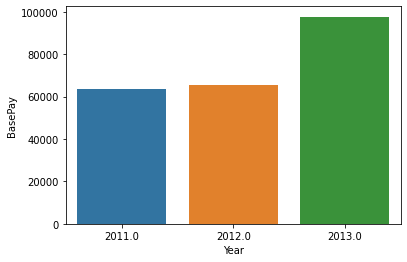

<Figure size 432x288 with 0 Axes>

In [14]:
# сравниваю изменение зп в течении времени - посмотрим базовую зп (по всем вакансиям)
import seaborn as sns 

sal = df1.groupby('Year').mean()
sal.reset_index(inplace=True)
sns.barplot(x = 'Year', y='BasePay' , data = sal)
plt.figure()


In [15]:
# посмотрим кол-во зарплат разных должностей
df1['JobTitle'].value_counts()

Transit Operator                             3861
Registered Nurse                             2392
TRANSIT OPERATOR                             2388
Special Nurse                                1629
Police Officer 3                             1588
                                             ... 
TREASURER                                       1
ASSISTANT DIRECTOR OF CLINICAL SERVICES I       1
Animal Care Asst Supv                           1
COURT SUPERVISOR I                              1
SHADE AND DRAPERY WORKER                        1
Name: JobTitle, Length: 2112, dtype: int64

In [16]:
df1['BasePay'] = df['BasePay'].apply(pd.to_numeric, downcast='float', errors='coerce')
df1.groupby(['Year','JobTitle'],as_index=False).mean()



,Year,JobTitle,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,2011.0,ACCOUNT CLERK,25734.819277,43300.806506,373.200843,361.656988,44035.664337,44035.664337
1,2011.0,ACCOUNTANT,24159.200000,46643.172000,0.000000,786.096000,47429.268000,47429.268000
2,2011.0,ACCOUNTANT INTERN,28128.833333,28732.663958,24.430625,274.648333,29031.742917,29031.742917
3,2011.0,ACUPUNCTURIST,18379.000000,66374.400000,0.000000,1220.000000,67594.400000,67594.400000
4,2011.0,ADMINISTRATIVE ANALYST,19052.946237,63435.628602,0.000000,519.238925,63954.867527,63954.867527
...,...,...,...,...,...,...,...,...
3007,2013.0,Wire Rope Cable Maint Mechanic,80196.125000,77345.212500,46947.951250,12474.551250,136767.715000,164675.622500
3008,2013.0,Wire Rope Cable Maint Sprv,74250.000000,95716.510000,81313.490000,16661.790000,193691.790000,229678.620000
3009,2013.0,Worker's Comp Supervisor 1,83283.500000,103838.565000,0.000000,324.000000,104162.565000,137826.895000
3010,2013.0,Worker's Compensation Adjuster,88819.727273,81925.690455,0.000000,321.266364,82246.956818,112090.654091


In [17]:
t1 = df1.JobTitle.str.contains('FIRE DEPARTMENT') # выбрала зарплаты 
fire_df = df1[t1]
fire_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,326373.19,326373.19,2011.0,San Francisco
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.90,134426.14,315981.05,315981.05,2011.0,San Francisco
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,303427.55,303427.55,2011.0,San Francisco
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.00,0.00,17115.73,302377.73,302377.73,2011.0,San Francisco
10,11,ARTHUR KENNEY,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",194999.39,71344.88,33149.90,299494.17,299494.17,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...
4955,4956,AUDRY LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",21804.00,46307.75,56392.91,124504.66,124504.66,2011.0,San Francisco
5498,5499,VINCENT PEREZ,"LIEUTENANT, FIRE DEPARTMENT",59663.78,13979.51,47704.14,121347.43,121347.43,2011.0,San Francisco
8436,8437,JENSEN RHODES,"LIEUTENANT, FIRE DEPARTMENT",93066.59,1626.13,10703.77,105396.49,105396.49,2011.0,San Francisco
16285,16286,AARON STEVENSON,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",21948.99,14065.26,37430.72,73444.97,73444.97,2011.0,San Francisco


In [18]:
# сразу посчитаем кол-во людей в отделе
fire_df.groupby('EmployeeName')['EmployeeName'].count()

EmployeeName
AARON STEVENSON         2
AISHA KRIEGER           1
ALAN REYNAUD            1
ALAN WONG               1
ALBERTO PEDRUCO         1
                       ..
VINCENT PEREZ           1
WALTER VILLAVICENCIO    1
WAYNE WONG              1
WILLIAM MCFARLAND       1
ZACHARY PUMPHREY        1
Name: EmployeeName, Length: 221, dtype: int64

In [19]:
fire_df['BasePay'] = df['BasePay'].apply(pd.to_numeric, downcast='float', errors='coerce') # сгруппировала по году
fire_df.groupby(['Year','JobTitle'],as_index=False).mean()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,JobTitle,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,2011.0,"ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",5454.666667,131621.046667,40684.903333,31121.900000,203427.850000,203427.850000
1,2011.0,"BATTALION CHIEF, (FIRE DEPARTMENT)",1092.866667,144875.108667,35115.257333,36665.170889,216655.536889,216655.536889
2,2011.0,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",10.000000,285262.000000,0.000000,17115.730000,302377.730000,302377.730000
3,2011.0,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",26.000000,199852.653333,4605.000000,74901.906667,279359.560000,279359.560000
4,2011.0,"LIEUTENANT, FIRE DEPARTMENT",1729.088235,123166.477471,24492.825941,16491.918588,164151.222000,164151.222000


In [20]:
fire_df['BasePay'].max() # нашла максимальную базовую зарплату

285262.0

In [21]:
fire_df['BasePay'].mean() # нашла среднее значение

129447.58630630636

In [22]:
fire_df['BasePay'].median() # медианное значение

123105.02

In [25]:
t2 = df1.JobTitle.str.contains('MEDIC')
med_df = df1[t2]
med_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
17,18,SEBASTIAN WONG,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",140546.87,119397.26,18625.08,278569.21,278569.21,2011.0,San Francisco
19,20,ELLEN MOFFATT,ASSISTANT MEDICAL EXAMINER,257510.59,880.16,16159.50,274550.25,274550.25,2011.0,San Francisco
20,21,VENUS AZAR,ASSISTANT MEDICAL EXAMINER,257510.48,0.00,16679.79,274190.27,274190.27,2011.0,San Francisco
21,22,JUDY MELINEK,ASSISTANT MEDICAL EXAMINER,257510.44,377.21,15883.56,273771.21,273771.21,2011.0,San Francisco
36,37,SUSAN CURRIN,"ADMINISTRATOR, SFGH MEDICAL CENTER",245124.44,0.00,12000.00,257124.44,257124.44,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...
35597,35598,JOHN CORTEZ,MEDICAL SOCIAL WORKER,0.00,0.00,672.04,672.04,672.04,2011.0,San Francisco
35732,35733,NICOLE BARTOLINI,MEDICAL SOCIAL WORKER,516.40,0.00,20.66,537.06,537.06,2011.0,San Francisco
35764,35765,CRAIG STROOPE,MEDICAL EXAMINER'S INVESTIGATOR I,0.00,0.00,481.02,481.02,481.02,2011.0,San Francisco
36076,36077,DEBRA TANIS,FIRE RESCUE PARAMEDIC,0.00,0.00,92.21,92.21,92.21,2011.0,San Francisco


In [26]:
# сразу посчитаем кол-во людей в отделе
med_df.groupby('EmployeeName')['EmployeeName'].count()

EmployeeName
ADAM DOMINGUEZ     1
ADAM HELLMAN       1
ADAM LEWIS         1
AL GARZA           1
ALAN PRINGLE       1
                  ..
YOLANDA HERRON     1
YUBING XUE         1
YVETTE ANDERSON    1
ZACHARY BEATTY     1
ZAYINNA LEIVA      1
Name: EmployeeName, Length: 739, dtype: int64

In [27]:
med_df['BasePay'] = df['BasePay'].apply(pd.to_numeric, downcast='float', errors='coerce') # сгруппировала по году
med_df.groupby(['Year','JobTitle'],as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,JobTitle,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,2011.0,"ADMINISTRATOR, SFGH MEDICAL CENTER",37.000000,245124.440000,0.000000,12000.000000,257124.440000,257124.440000
1,2011.0,ASSISTANT MEDICAL EXAMINER,3170.400000,199964.568000,251.474000,12577.130000,212793.172000,212793.172000
2,2011.0,"CAPTAIN, EMERGENCYCY MEDICAL SERVICES",2775.208333,131835.131250,24316.274167,17859.551250,174010.956667,174010.956667
3,2011.0,EMERGENCY MEDICAL SERVICES AGENCY SPECIALIST,17472.833333,63474.136667,0.000000,8974.040000,72448.176667,72448.176667
4,2011.0,FIRE FIGHTER PARAMEDIC,6230.730897,102572.556246,15239.395714,11616.559136,129428.511096,129428.511096
5,2011.0,FIRE RESCUE PARAMEDIC,15513.285714,67346.748571,1426.511429,12171.924286,80945.184286,80945.184286
6,2011.0,MEDICAL EVALUATIONS ASSISTANT,25231.272727,41968.424364,1260.968061,1311.529758,44540.922182,44540.922182
7,2011.0,MEDICAL EXAMINER'S INVESTIGATOR I,29786.900000,19584.314000,640.706000,518.185000,20743.205000,20743.205000
8,2011.0,MEDICAL EXAMINER'S INVESTIGATOR II,8875.375000,83139.748750,12349.671250,8333.238750,103822.658750,103822.658750
9,2011.0,MEDICAL EXAMINER'S INVESTIGATOR III,8301.500000,68877.580000,5702.905000,31607.910000,106188.395000,106188.395000


In [28]:
med_df['BasePay'].max()

257510.59

In [29]:
med_df['BasePay'].mean()

75859.64047361302

In [30]:
med_df['BasePay'].median()

71777.32

In [31]:
t3 = df1.JobTitle.str.contains('POLICE')
police_df = df1[t3]
police_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,Year,Agency
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,538909.28,538909.28,2011.0,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,335279.91,335279.91,2011.0,San Francisco
11,12,PATRICIA JACKSON,CAPTAIN III (POLICE DEPARTMENT),99722.00,87082.62,110804.30,297608.92,297608.92,2011.0,San Francisco
15,16,RICHARD CORRIEA,"COMMANDER III, (POLICE DEPARTMENT)",198778.01,73478.20,13957.65,286213.86,286213.86,2011.0,San Francisco
25,26,GREGORY SUHR,CHIEF OF POLICE,256470.41,0.00,11522.18,267992.59,267992.59,2011.0,San Francisco
...,...,...,...,...,...,...,...,...,...,...
35131,35132,CYNTHIA HAYNES-EPPERSON,SENIOR POLICE COMMUNICATIONS DISPATCHER,1006.40,0.00,361.82,1368.22,1368.22,2011.0,San Francisco
35151,35152,LYNN BLOOM,POLICE SERVICES AIDE,0.00,0.00,1324.80,1324.80,1324.80,2011.0,San Francisco
35318,35319,ROBERT CHAPMAN,POLICE OFFICER III,0.00,0.00,1088.00,1088.00,1088.00,2011.0,San Francisco
35671,35672,RUSSELL MATLI,POLICE OFFICER III,0.00,0.00,597.31,597.31,597.31,2011.0,San Francisco


In [32]:
# сразу посчитаем количество людей в отделе
police_df.groupby('EmployeeName')['EmployeeName'].count()

EmployeeName
AARON BALLONADO      1
AARON COWHIG         1
AARON FISCHER        1
AARON FOLTZ          1
AARON LOZADA         1
                    ..
YVETTE POINDEXTER    1
YVONNE ALLEN         1
YVONNE MOILANEN      1
ZAHID KHAN           1
ZOILA MAGUINA        1
Name: EmployeeName, Length: 2487, dtype: int64

In [33]:
police_df['BasePay'] = df['BasePay'].apply(pd.to_numeric, downcast='float', errors='coerce') # сгруппировала по году
police_df.groupby(['Year','JobTitle'],as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,JobTitle,Id,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits
0,2011.0,AIRPORT POLICE SERVICES AIDE,20580.267380,51178.742834,5478.936096,3472.252353,60129.931283,60129.931283
1,2011.0,ASSISTANT INSPECTOR (POLICE DEPARTMENT),434.000000,123169.950000,45679.840000,20149.410000,188999.200000,188999.200000
2,2011.0,ASSISTANT INSPECTOR II (POLICE DEPARTMENT),2250.100000,127866.102000,13547.629000,9475.130000,150888.861000,150888.861000
3,2011.0,ASSISTANT INSPECTOR III (POLICE DEPARTMENT),2183.888889,130479.954444,13373.892222,8817.368889,152671.215556,152671.215556
4,2011.0,CAPTAIN III (POLICE DEPARTMENT),670.189189,170183.408649,15874.425405,25726.059189,211783.893243,211783.893243
5,2011.0,CHIEF OF POLICE,26.000000,256470.410000,0.000000,11522.180000,267992.590000,267992.590000
6,2011.0,"COMMANDER III, (POLICE DEPARTMENT)",731.571429,167042.752857,15796.962857,22296.791429,205136.507143,205136.507143
7,2011.0,DEPUTY CHIEF III (POLICE DEPARTMENT),47.000000,219758.726000,0.000000,30267.762000,250026.488000,250026.488000
8,2011.0,"INSPECTOR II, (POLICE DEPARTMENT)",2698.666667,128145.436667,9213.790000,6923.510000,144282.736667,144282.736667
9,2011.0,"INSPECTOR III, (POLICE DEPARTMENT)",2461.481481,120294.284259,14408.287593,19423.711605,154126.283457,154126.283457


In [34]:
police_df['BasePay'].max()

261717.6

In [35]:
police_df['BasePay'].mean()

105981.21477308912

In [36]:
police_df['BasePay'].median()

111976.14

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


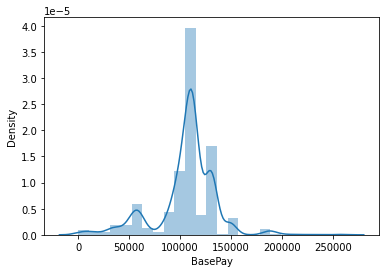

In [37]:
import seaborn as sns
from pandas import Series,DataFrame
sns.distplot(police_df['BasePay'],bins=25) # посмотрим как распределялась базовая зп работников полиции
plt.show()

<Figure size 432x288 with 0 Axes>

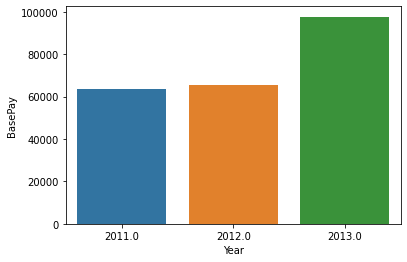

<Figure size 432x288 with 0 Axes>

In [38]:
police = police_df.groupby('Year').mean() # посмотрим как со временем менялась базовая зп работников полиции
police.reset_index(inplace=True)
sns.barplot(x = 'Year', y='BasePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


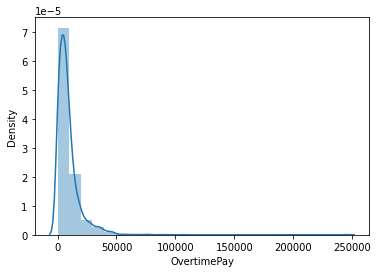

In [39]:
sns.distplot(police_df['OvertimePay'],bins=25) # посмотрим как распределялись сверхурочные работников полиции
plt.show()

<Figure size 432x288 with 0 Axes>

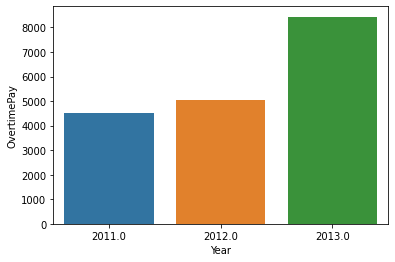

<Figure size 432x288 with 0 Axes>

In [40]:
police = police_df.groupby('Year').mean() # посмотрим как со временем менялись сверхурочные работников полиции
police.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OvertimePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


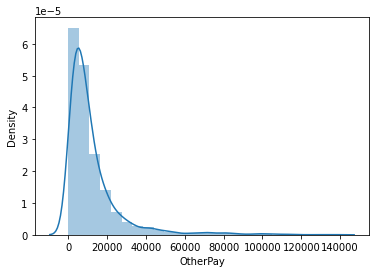

In [41]:
sns.distplot(police_df['OtherPay'],bins=25) # посмотрим как распределялись льготы работников полиции
plt.show()

<Figure size 432x288 with 0 Axes>

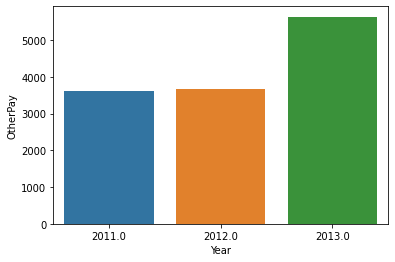

<Figure size 432x288 with 0 Axes>

In [42]:
police = police_df.groupby('Year').mean() # посмотрим как со временем менялись льготы работников полиции
police.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OtherPay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


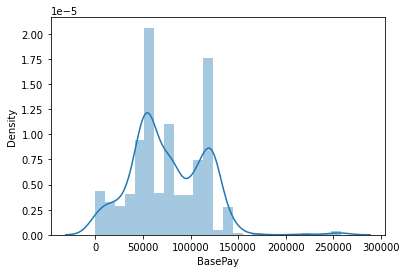

In [43]:
sns.distplot(med_df['BasePay'],bins=25) # посмотрим как распределялась базовая зп медиков
plt.show()

<Figure size 432x288 with 0 Axes>

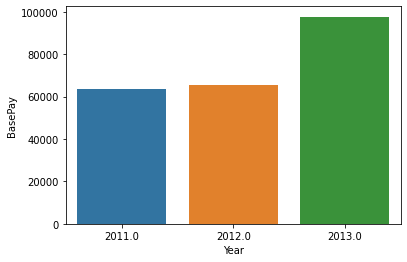

<Figure size 432x288 with 0 Axes>

In [44]:
med = med_df.groupby('Year').mean() # посмотрим как со временем менялась базовая зп медиков
med.reset_index(inplace=True)
sns.barplot(x = 'Year', y='BasePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


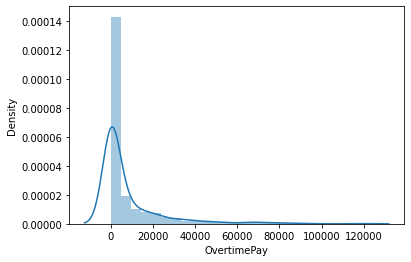

In [45]:
sns.distplot(med_df['OvertimePay'],bins=25) # посмотрим как распределялись сверхурочные медиков
plt.show()

<Figure size 432x288 with 0 Axes>

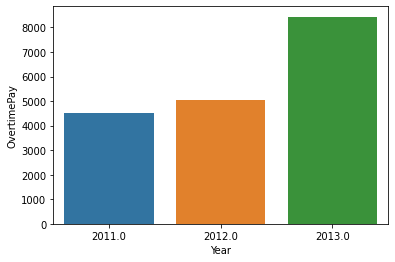

<Figure size 432x288 with 0 Axes>

In [46]:
med = med_df.groupby('Year').mean() # посмотрим как со временем менялись сверхурочные медиков
med.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OvertimePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


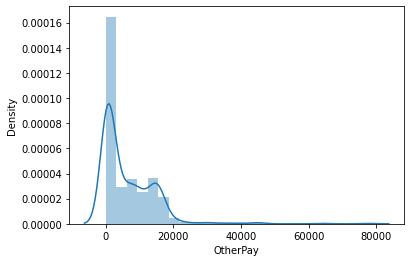

In [47]:
sns.distplot(med_df['OtherPay'],bins=25) # посмотрим как распределялись льготы медиков
plt.show()

<Figure size 432x288 with 0 Axes>

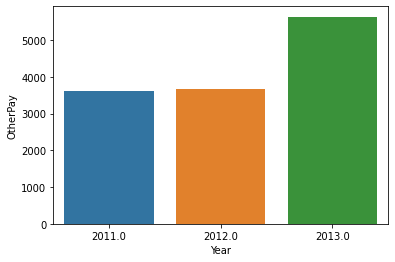

<Figure size 432x288 with 0 Axes>

In [48]:
med = med_df.groupby('Year').mean() # посмотрим как со временем менялись льготы медиков
med.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OtherPay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


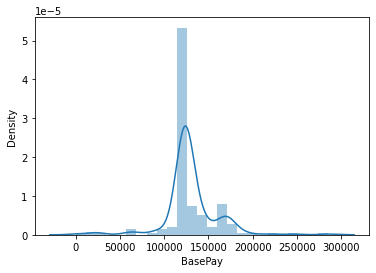

In [49]:
sns.distplot(fire_df['BasePay'],bins=25) # посмотрим как распределялась базовая зп пожарных

<Figure size 432x288 with 0 Axes>

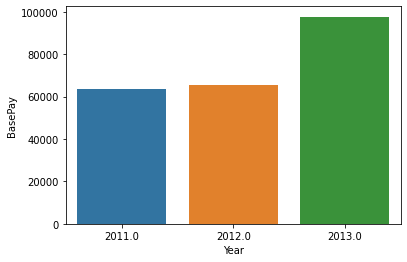

<Figure size 432x288 with 0 Axes>

In [50]:
fire = fire_df.groupby('Year').mean() # посмотрим как со временем менялась базовая пожарных
fire.reset_index(inplace=True)
sns.barplot(x = 'Year', y='BasePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


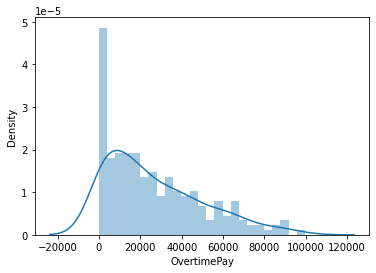

In [51]:
sns.distplot(fire_df['OvertimePay'],bins=25) # посмотрим как распределялись сверхурочные пожарных
plt.show()

<Figure size 432x288 with 0 Axes>

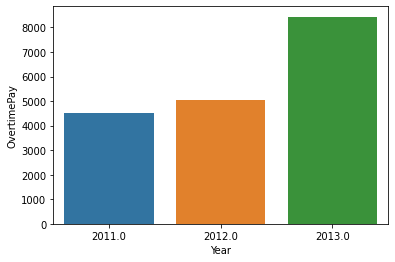

<Figure size 432x288 with 0 Axes>

In [52]:
fire = fire_df.groupby('Year').mean() # посмотрим как со временем менялись сверхурочные пожарных
fire.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OvertimePay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


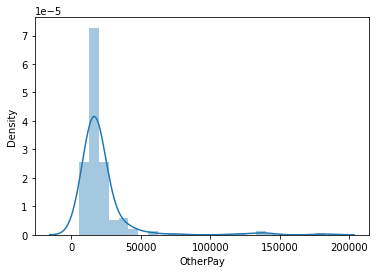

In [53]:
sns.distplot(fire_df['OtherPay'],bins=25) # посмотрим как распределялись льготы медиков
plt.show()

<Figure size 432x288 with 0 Axes>

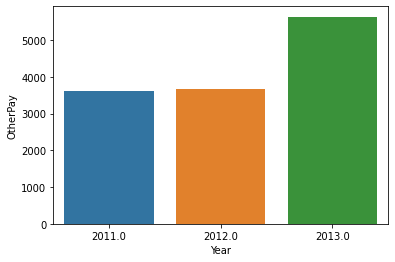

<Figure size 432x288 with 0 Axes>

In [54]:
fire = fire_df.groupby('Year').mean() # посмотрим как со временем менялись льготы пожарных
fire.reset_index(inplace=True)
sns.barplot(x = 'Year', y='OtherPay' , data = sal)
plt.figure()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


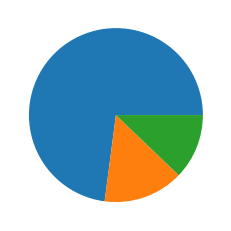

In [55]:
# переделаем датафрейм, оставив необходимые колонки
fi = fire.query('2011 == Year')
f1 = fi.drop(['Year','Id', 'TotalPay', 'TotalPayBenefits'], axis = 1) # удалила колонку 
plt.pie(f1)
plt.show()
# построим диаграмму распределения средств за 2011 год, видно, что самая большая часть средств идет на базовую зп, остальное в равных долях распределяется между льготами и сверхурочными

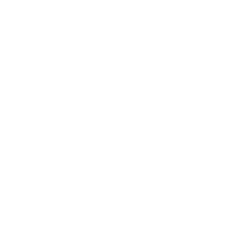

In [56]:
# аналогично проиллюстрируем 2012 и 2013 гг
fa = fire.query('2012 == Year')
f2 = fa.drop(['Year','Id', 'TotalPay', 'TotalPayBenefits'], axis = 1)
plt.pie(f2)
plt.show()

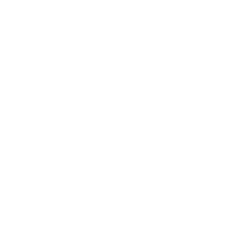

In [57]:
f = fire.query('2013 == Year')
f3 = f.drop(['Year','Id', 'TotalPay', 'TotalPayBenefits'], axis = 1)
plt.pie(f3)
plt.show()

In [58]:
# определим кол-во людей в каждом департаменте проведем группировку по имени 

fire_df.groupby('EmployeeName')['EmployeeName'].count()

EmployeeName
AARON STEVENSON         2
AISHA KRIEGER           1
ALAN REYNAUD            1
ALAN WONG               1
ALBERTO PEDRUCO         1
                       ..
VINCENT PEREZ           1
WALTER VILLAVICENCIO    1
WAYNE WONG              1
WILLIAM MCFARLAND       1
ZACHARY PUMPHREY        1
Name: EmployeeName, Length: 221, dtype: int64

In [59]:
police_df.groupby('EmployeeName')['EmployeeName'].count()

EmployeeName
AARON BALLONADO      1
AARON COWHIG         1
AARON FISCHER        1
AARON FOLTZ          1
AARON LOZADA         1
                    ..
YVETTE POINDEXTER    1
YVONNE ALLEN         1
YVONNE MOILANEN      1
ZAHID KHAN           1
ZOILA MAGUINA        1
Name: EmployeeName, Length: 2487, dtype: int64

In [60]:
med_df.groupby('EmployeeName')['EmployeeName'].count()

EmployeeName
ADAM DOMINGUEZ     1
ADAM HELLMAN       1
ADAM LEWIS         1
AL GARZA           1
ALAN PRINGLE       1
                  ..
YOLANDA HERRON     1
YUBING XUE         1
YVETTE ANDERSON    1
ZACHARY BEATTY     1
ZAYINNA LEIVA      1
Name: EmployeeName, Length: 739, dtype: int64